# Curve fitting
In this notebook, we will explore the use of some python functions to fit nonlinear functions (such as Gaussian, sine, or polynomial functions) to data. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Curve fitting optimization
from scipy import optimize

%matplotlib inline

### Step 1: generate some data. 
To explore model fitting, we need to have some data with a true function underlying it. Let's use a Gaussian, because (a) many phenomena in the world are well modeled by Gaussian functions, and (b) we have used Gaussians a bunch already in this class.

In [2]:
# Here's a function to define a 1D Gaussian curve:
def gauss(x, mu, sigma, amp=1):
    """Estimate value of Gaussian function for specific value or values of x
    Parameters
    ----------
    x : scalar or array-like
        value or values at which to evaluate the Gaussian
    mu : scalar
        mean of Gaussian
    sigma : scalar
        std of Gaussian
    amp : amplitude of Gaussian
    
    Returns
    -------
    valueof Gaussian at `x`
    """
    return amp * np.e**(-(x-mu)**2 / (2*sigma))



> Generate some data for a Gaussian with some particular mean and standard deviation. 

Pick a `mu` and `sigma` value, and decide which X values should you use. Define `y` as the output of the plot `x` against the output ofthe g

In [3]:
# Answer


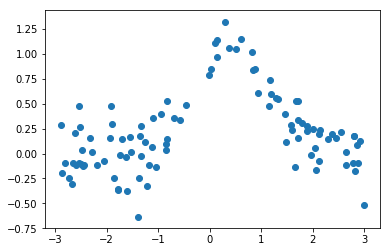

In [4]:
# Answer
n = 101 # number of data points
mu = 0.5 # mean of the true Gaussian function
sigma = 0.5 # standard deviation of the true Gaussian function
# Generate some random input values for the input to the Gaussian
x = np.random.uniform(low=-3, high=3, size=(n,))
# Generate perfect data (that is exactly the output of a Gaussian function of x)
y_perfect = gauss(x, mu=mu, sigma=sigma, amp=1)
# Add some random normal (i.e., Gaussian...) noise
noise = np.random.normal(loc=0, scale=0.2, size=y_perfect.shape)
y = y_perfect + noise
# Plot the result
plt.scatter(x, y,)

### Step 2: use `scipy.optimize.curve_fit()` to estimate the parameters ($\mu$, $\sigma$) of the underlying Gaussian function

In [5]:
# The inputs to the curve fitting function are:
params, params_covariance = optimize.curve_fit(gauss, # The executable function to be fit
                                               x, # The observed (here, simulated) input data to the function
                                               y, # The observed (here, simulated) output from the function
                                               p0=None # initial guesses as to parameter values. 
                                              )

Note: the initial guesses are not critically important for this first fit, but we will see later how they can be very important.

In [6]:
# The `params` output contains the estimates for mu and sigma (and amp, technically)
mu_est, sigma_est, amp_est = params
# Print out formatted output (this syntax is very similar to matlab's sprintf function... worth knowing)
print('real mu: %0.3f, estimated mu: %0.3f'%(mu, mu_est))
print('real sigma: %0.3f, estimated sigma: %0.3f'%(sigma, sigma_est))

real mu: 0.500, estimated mu: 0.435
real sigma: 0.500, estimated sigma: 0.474


Not bad! Now, we can use the estimated values to make predictions of the data we had:

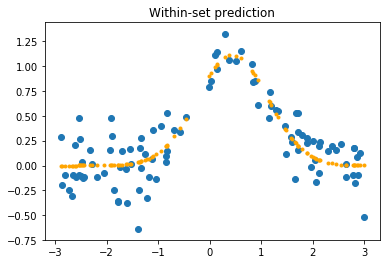

In [7]:
ypred_within_set = gauss(x, mu_est, sigma_est, amp_est)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, ypred_within_set, '.', color='orange')
ax.set_title("Within-set prediction");

Another way to go is to fit NEW data. To plot a pretty curve, let's compute the expected function output for some x values that are very regular - say, linearly spaced over the original range of our data. Technically, this is predicting out of set to new data that we didn't use to fit the model. We don't have out-of-set y data yet, though we could generate some... (that's left as an exercise to you). 

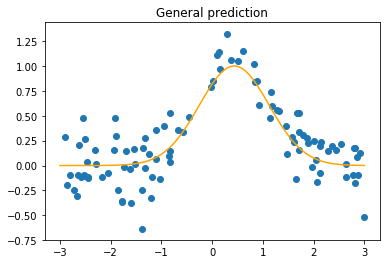

In [8]:
x_test = np.linspace(-3, 3, 101)
y_test_gauss = gauss(x_test, mu_est, sigma_est)
# and plot it
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_test, y_test_gauss, '-', color='orange')
ax.set_title("General prediction");

Neat!

# Fitting other functions 
Now let's fit a sine curve to the same data, just for giggles. To do this, we need to define a parametric sine function with parameters for the frequency and phase of the sine curve.

In [9]:
# Sine function
def sinx(x, freq, phase, amp=1.0):
    y = np.sin(x * 2 * np.pi * freq + phase) * amp
    return y

In [10]:
# Fit this function to the data the same way!
# Note that the input function changed from `gauss` to `sinx`, but all else (input, output data) is the same as above.
params_sin, params_covariance_sin = optimize.curve_fit(sinx, x, y, p0=None)
# Extract the parameters
freq_est, phase_est, amp_est = params_sin

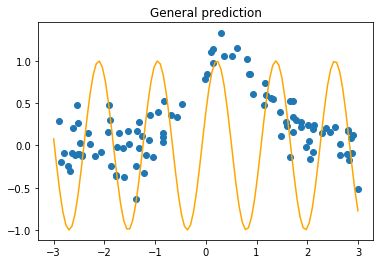

In [11]:
# Plot the results
x_test = np.linspace(-3, 3, 101)
y_test_sin = sinx(x_test, freq_est, phase_est)
# and plot it
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_test, y_test_sin, '-', color='orange')
ax.set_title("General prediction");

Oopsies! that didn't go so well. Let's try incorporating an educated guess about the parameters.

In [45]:
# p0 is your guess for the (freq, phase, amp) parameters
freq_guess = 1/6 # This is in cycles per unit of the graph. So, probably << 1, since there is only about one cycle
               # for 6 total units of X. Let's try 1/6!
phase_guess = 0.2 # phase varies from 0-2pi. This may need to be adjusted.
amp_guess = 1 # stick with 1
params_sin, params_covariance_sin = optimize.curve_fit(sinx, x, y, p0=(freq_guess, phase_guess, amp_guess))
# Extract the parameters
freq_est, phase_est, amp_est = params_sin

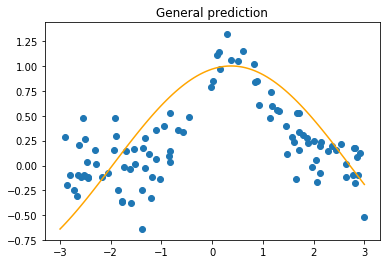

In [46]:
# Try to plot again
x_test = np.linspace(-3, 3, 101)
y_test_sin = sinx(x_test, freq_est, phase_est)
# and plot it
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_test, y_test_sin, '-', color='orange')
ax.set_title("General prediction");

Better! Run the cell several times with different initial guesses, see how different estimates will lead to different predictions.

# Evalutation 2, part 1a:
> Fit a simple quadratic function to the same data. 

The equation for a quadratic is $f(x) = ax^2 + b$

$a$ and $b$ are the parameters to be estimated. 

Estimate $a$ and $b$ using `optimize.curve_fit()`, and use the resulting parameter estimates to plot the predictions of the quadratic model to the data, as we did for the sin model in the cell(s) above.

In [84]:
# Answer


# Evaluation 2, part 1b:
Choose ONE of the following problems (A or B) to solve. For this, your code must RUN.

> A. Generate simulated (noisy) 2D Gaussian data. You will have to choose true parameters for the 2D Gaussian function ($mu_x$, $mu_y$, and $sigma$). Then use `optimize.curve_fit()` to recover estimates for the true parameters for the data, as we did above. Display the estimates for the parameters and the true parameters together. For bonus points, use the estimated parameters to generate a 2D Gaussian image, and display it. 

Use this function for generating a 2D gaussian:
```python
def gauss2d(xy, mu_x, mu_y, sigma, amp=1):
    """Generate a spherical 2D Gaussian function"""
    x, y = xy
    g = amp * np.e**(-((x - mu_x)**2 + (y - mu_y)**2) / (2 * sigma**2))
    return g
```

> B. Evaluate the error for the Gaussian, sine, and quadratic functions on the original data. The error is the sum of squared differences between the data and the within-set predictions. Show which function has the lowest error.

In [83]:
# Answer
